# Insurance Claim Fraud Detection

Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Independent Variables

# Dataset Link-  

•https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
original_data = df.copy()

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [8]:
df.shape

(1000, 40)

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [10]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

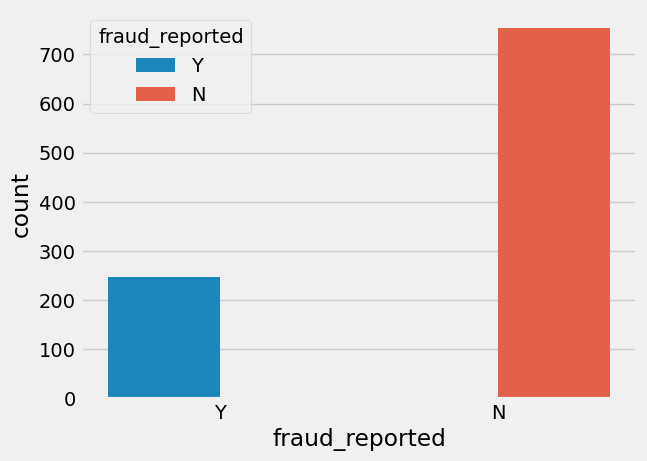

In [12]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [13]:
df.dtypes #  checking the types of columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are 3 different type of data(int64,float64 and object)present in the dataset.

# np.nan,None,NaN,others

In [14]:
df.isnull().sum()  # Checking the null values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)

In [20]:
#check missing or null or any values
print("Null Values: " + str(df.isnull().any().sum()))

Null Values: 0


In [16]:
df.isnull().sum()  # Checking the null values

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

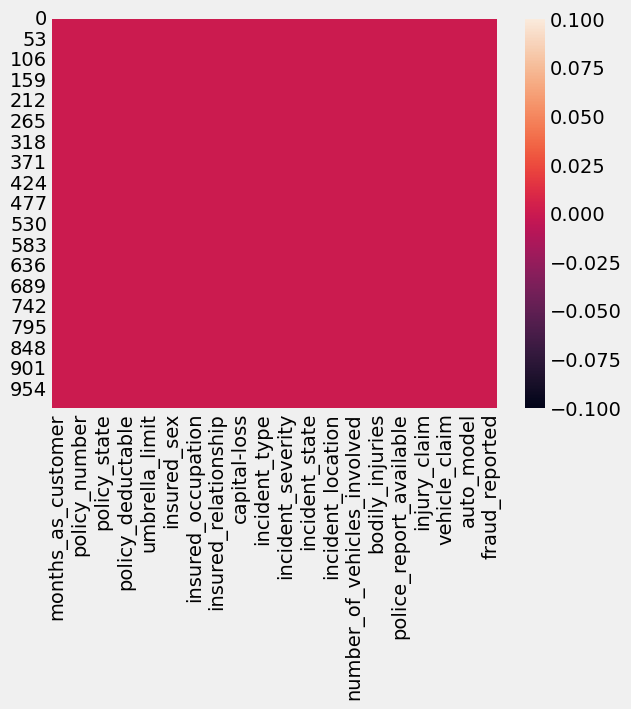

In [17]:
# lets visualize it using heatmap

sns.heatmap(df.isnull())

In [51]:
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

months_as_customer             0.0 %
age                            0.0 %
policy_number                  0.0 %
policy_bind_date               0.0 %
policy_state                   0.0 %
policy_csl                     0.0 %
policy_deductable              0.0 %
policy_annual_premium          0.0 %
umbrella_limit                 0.0 %
insured_zip                    0.0 %
insured_sex                    0.0 %
insured_education_level        0.0 %
insured_occupation             0.0 %
insured_hobbies                0.0 %
insured_relationship           0.0 %
capital-gains                  0.0 %
capital-loss                   0.0 %
incident_date                  0.0 %
incident_type                  0.0 %
collision_type                 0.0 %
incident_severity              0.0 %
authorities_contacted          0.0 %
incident_state                 0.0 %
incident_city                  0.0 %
incident_location              0.0 %
incident_hour_of_the_day       0.0 %
number_of_vehicles_involved    0.0 %
p

As we can see there are no null values present in this dataset.

(df.isnull().sum() used to check the null value present in your columns and .sum() method take the sum of all the null value present in the one features (columns))

In [18]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This gives the brief about the dataset which includes indexing type, columns,no null values and memory usage.

In [21]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

In [22]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='fraud_reported'>

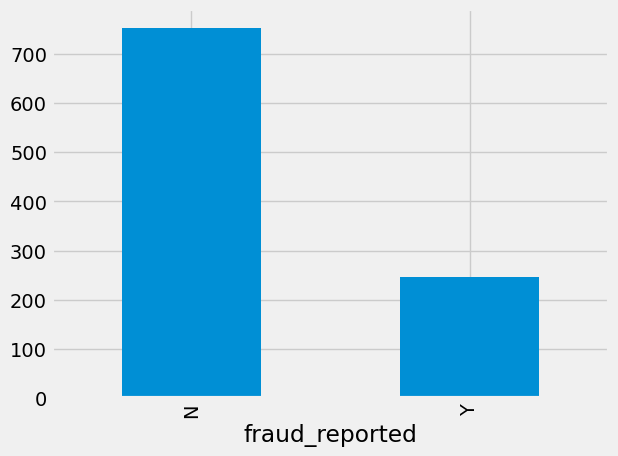

In [24]:
#Fraud Reported Stats
df_count_fraud = df.groupby(['fraud_reported']).count()
df_fraud = df_count_fraud['policy_number']
df_fraud.plot.bar(x='Fraud Reported', y='Count')

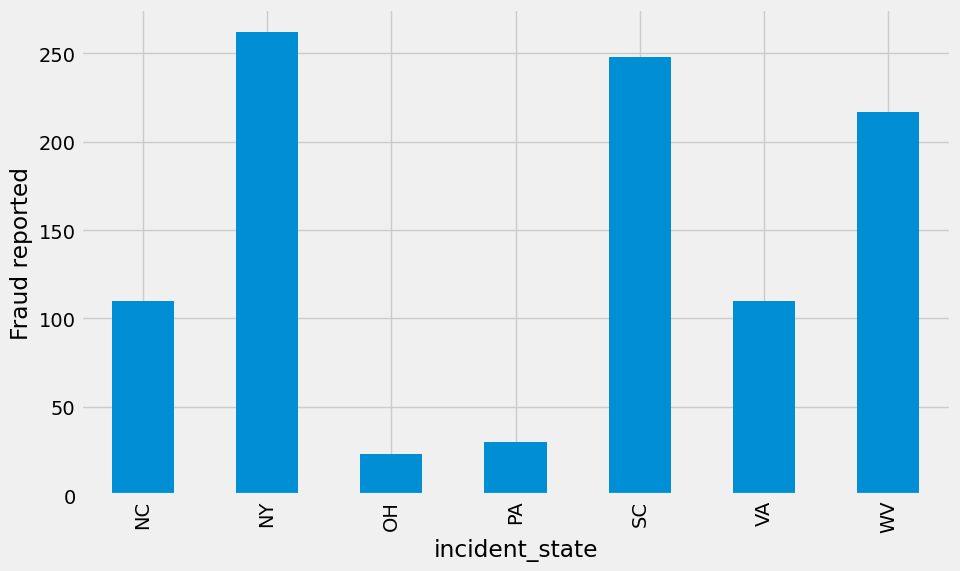

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

<AxesSubplot:xlabel='insured_education_level'>

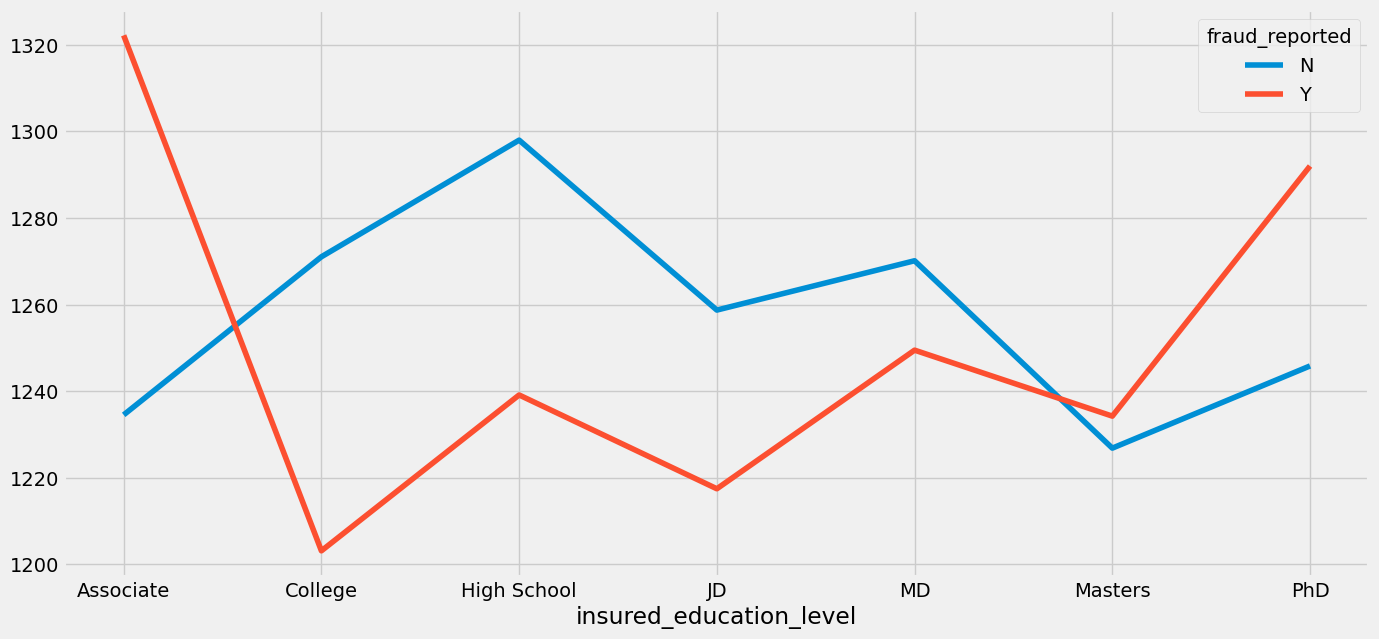

In [28]:
#Annual premium of education level policy_annual_premium
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = df.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
df_avg_prem.unstack().plot(ax=ax)

<AxesSubplot:xlabel='insured_occupation'>

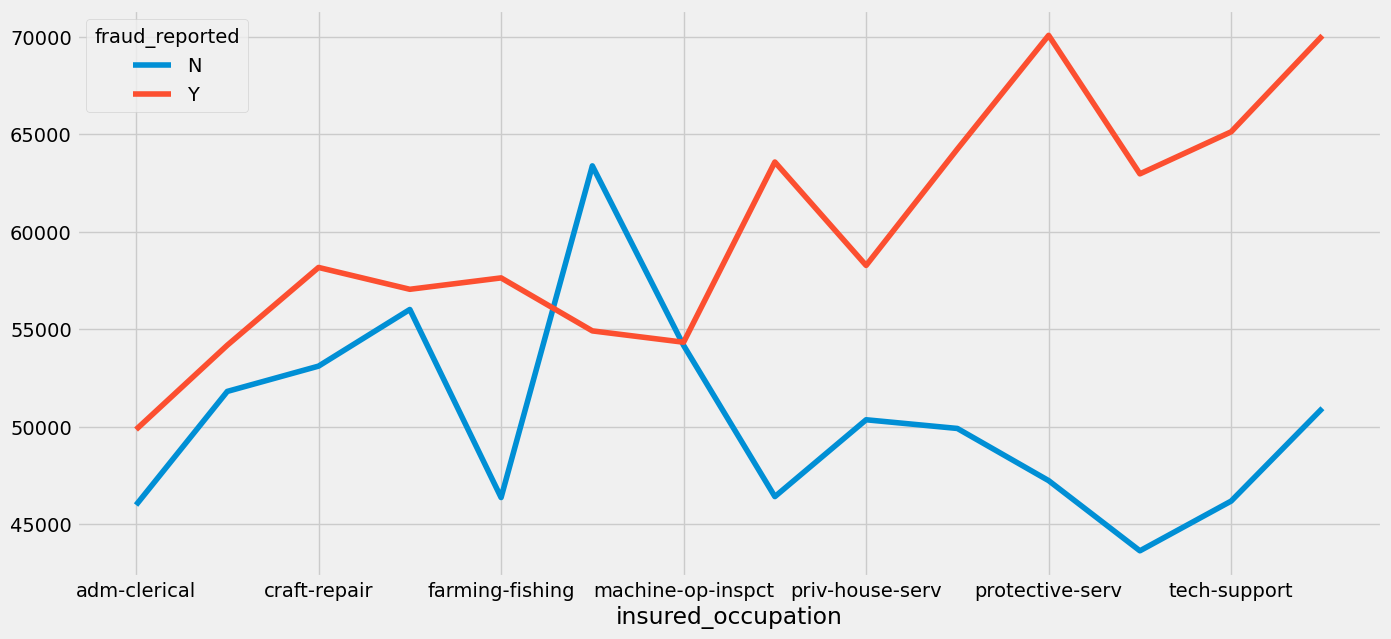

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)

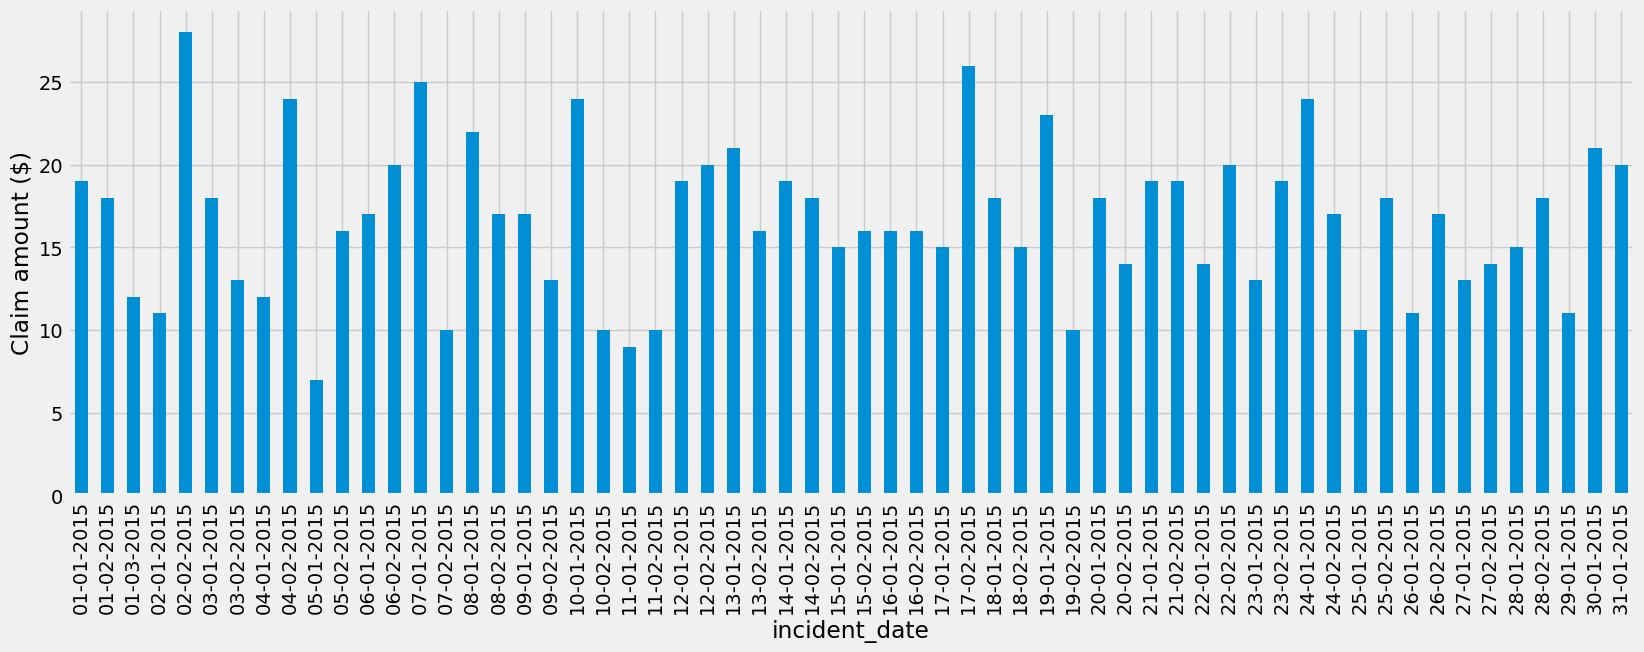

In [30]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

We see that, all the cases in above plot are for the months of January and February 2015

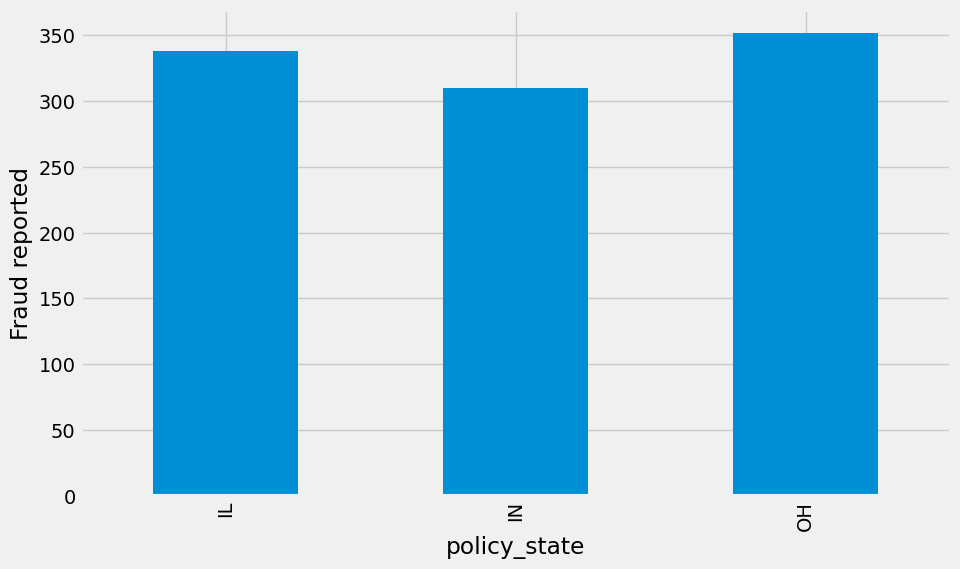

In [31]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

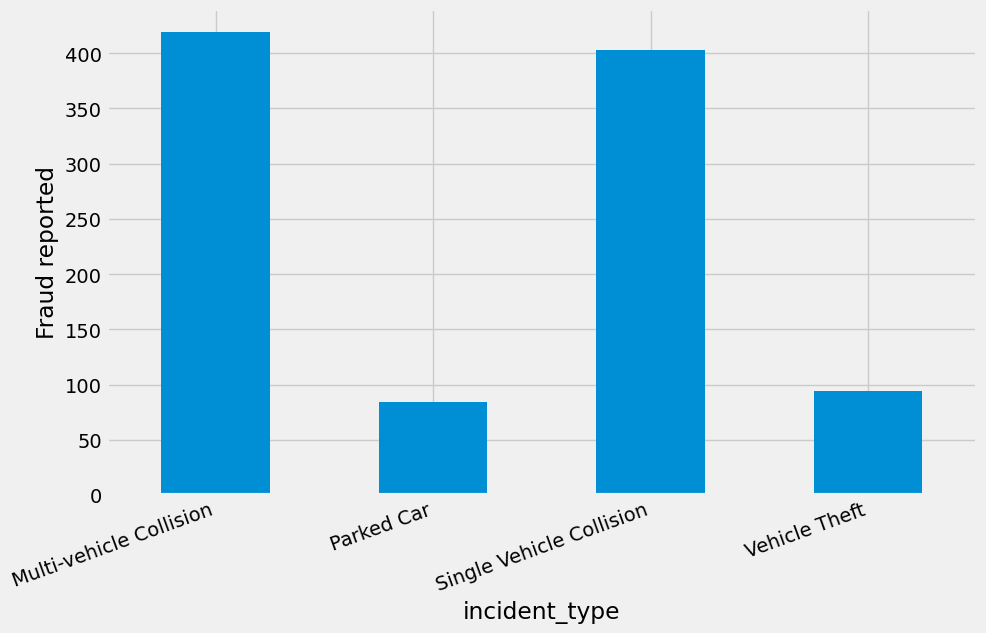

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

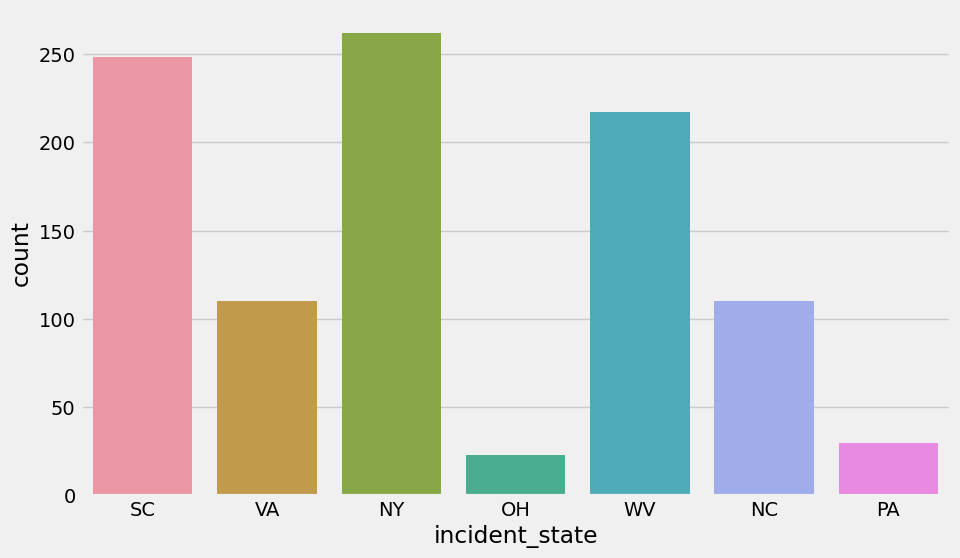

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

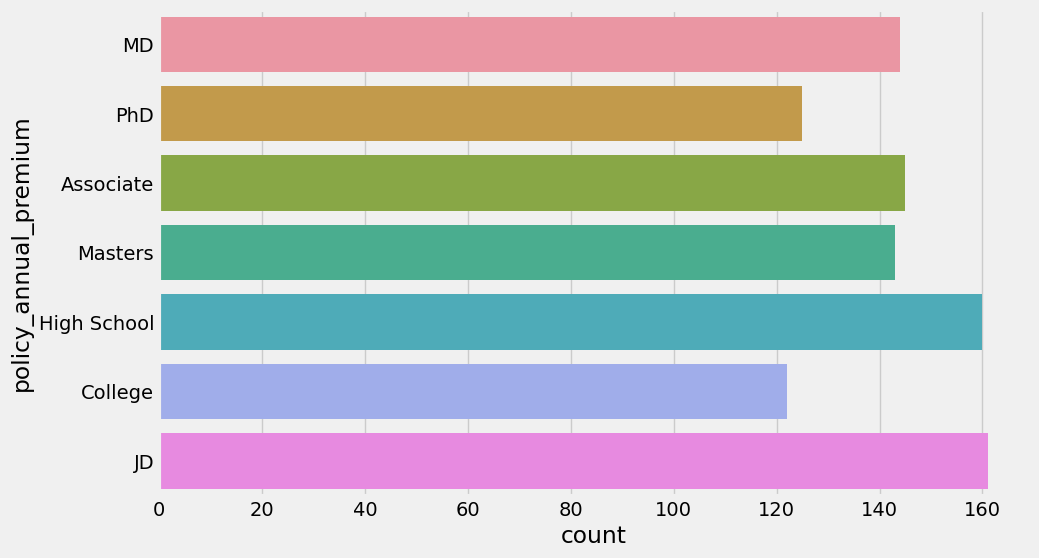

In [34]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

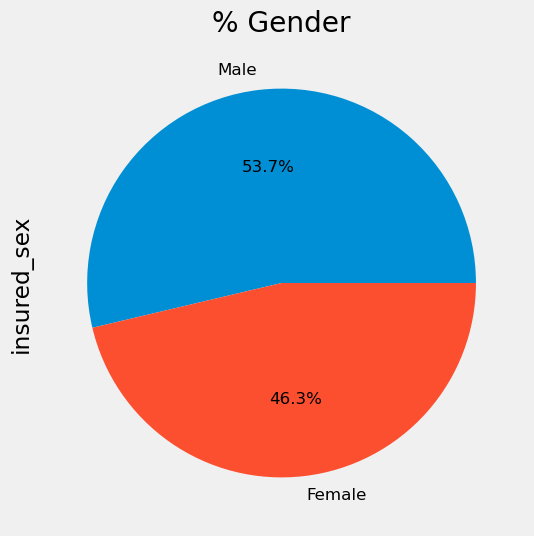

In [35]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

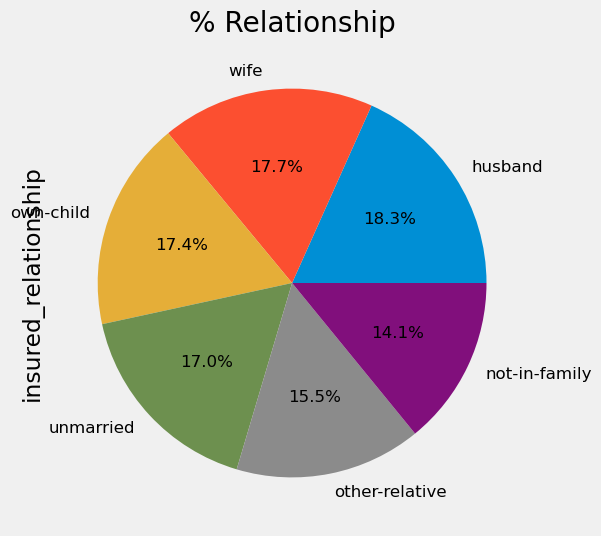

In [36]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

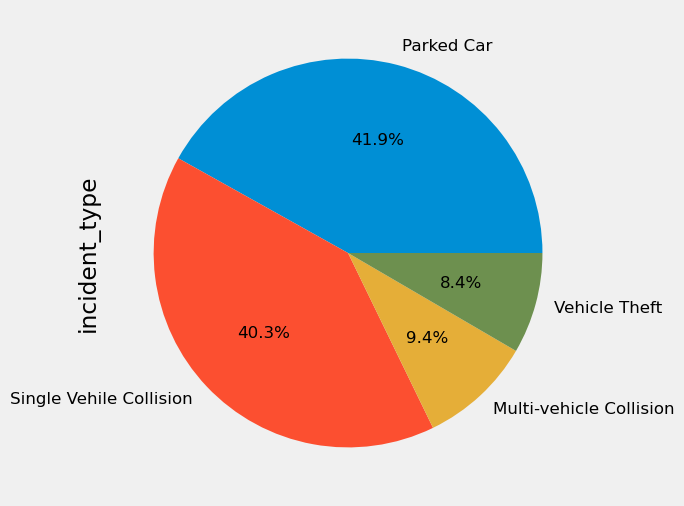

In [37]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)

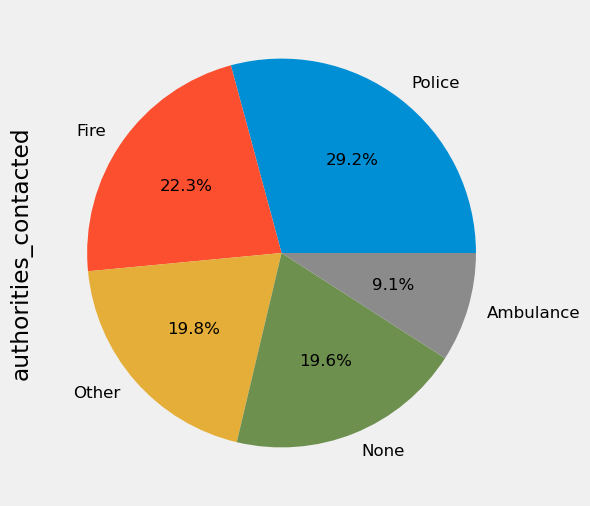

In [38]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

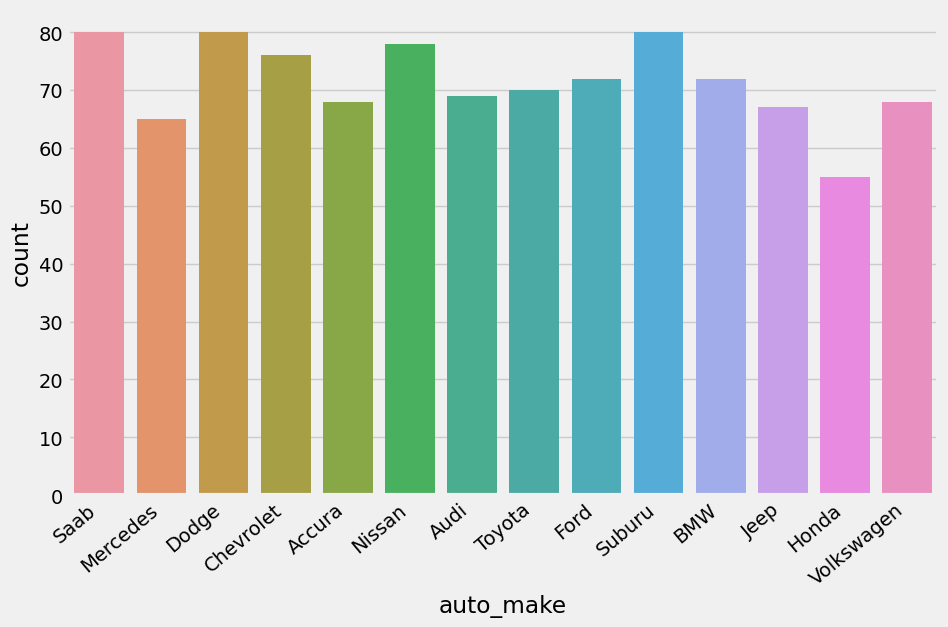

In [39]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

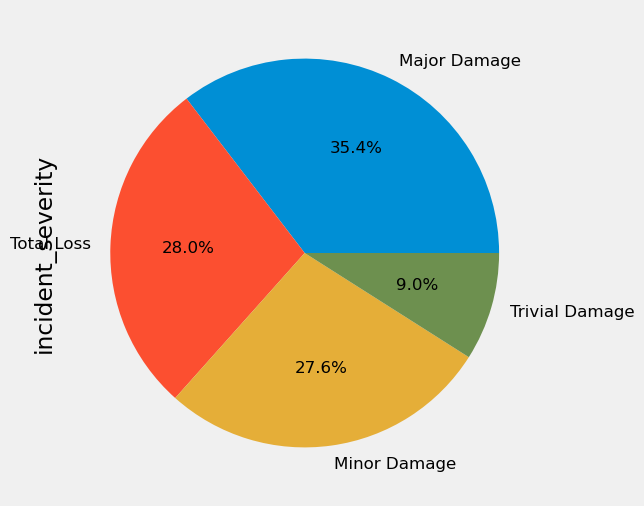

In [40]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12) 

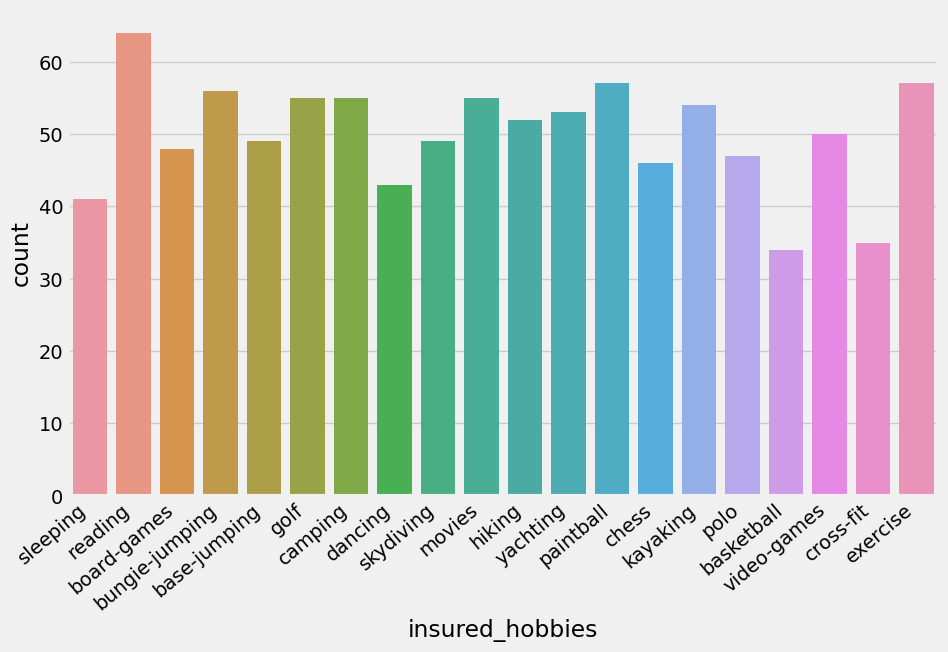

In [41]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [42]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

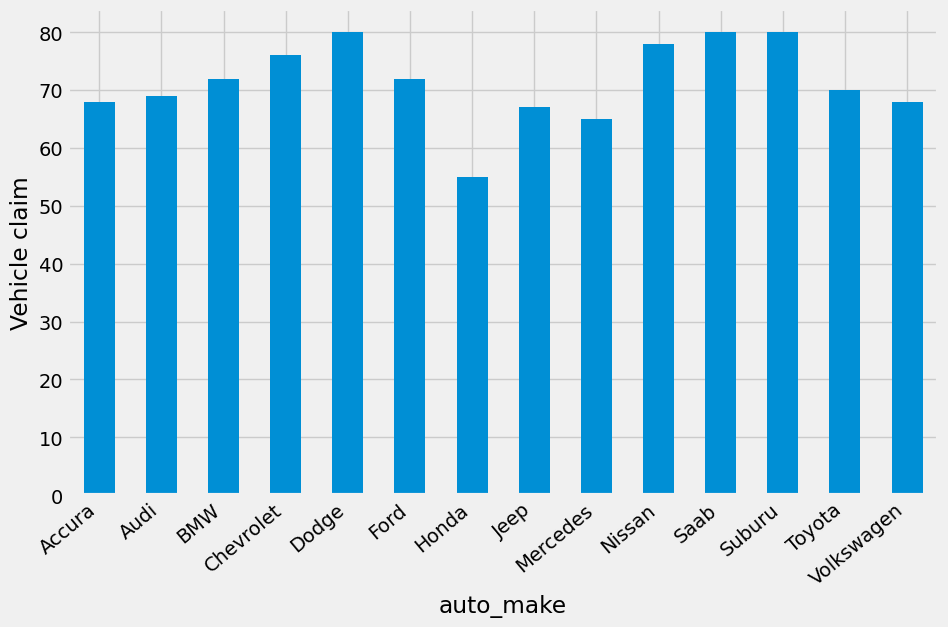

In [43]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

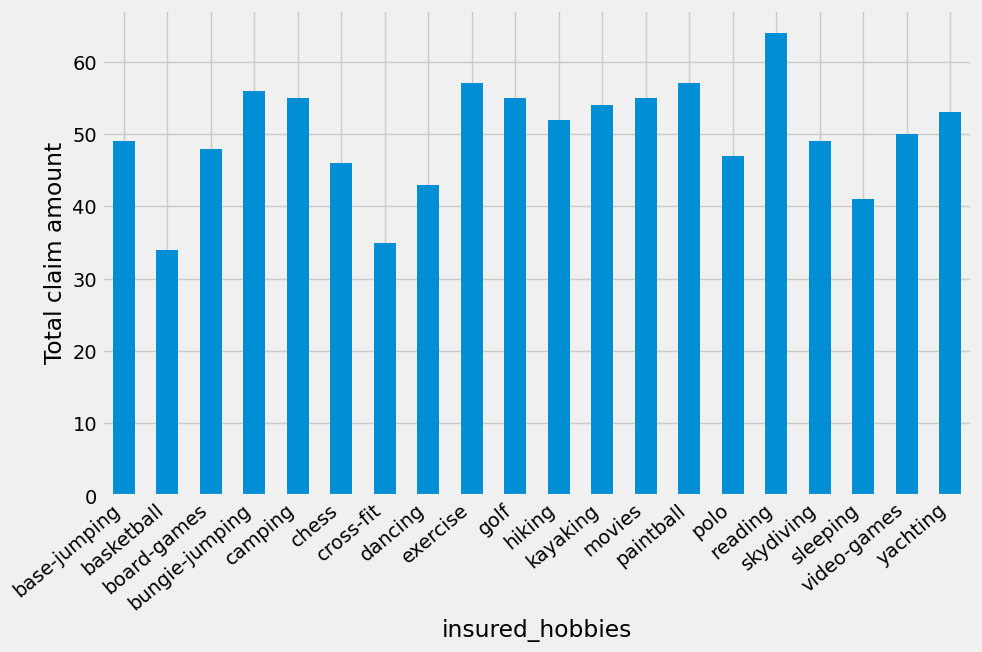

In [44]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Data Processing

Cleaning up the data and prepare it for machine learning model.

In [45]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [46]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [47]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.

In [48]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The means value is greater than the median(50%) in changes which means the data is skewed to right in these

3) The means value is less than the median(50%) in changes which means the data is skewed to left in these

3) By summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

4) We can also notice the standard deviation, min,25% percantile values from this describe method

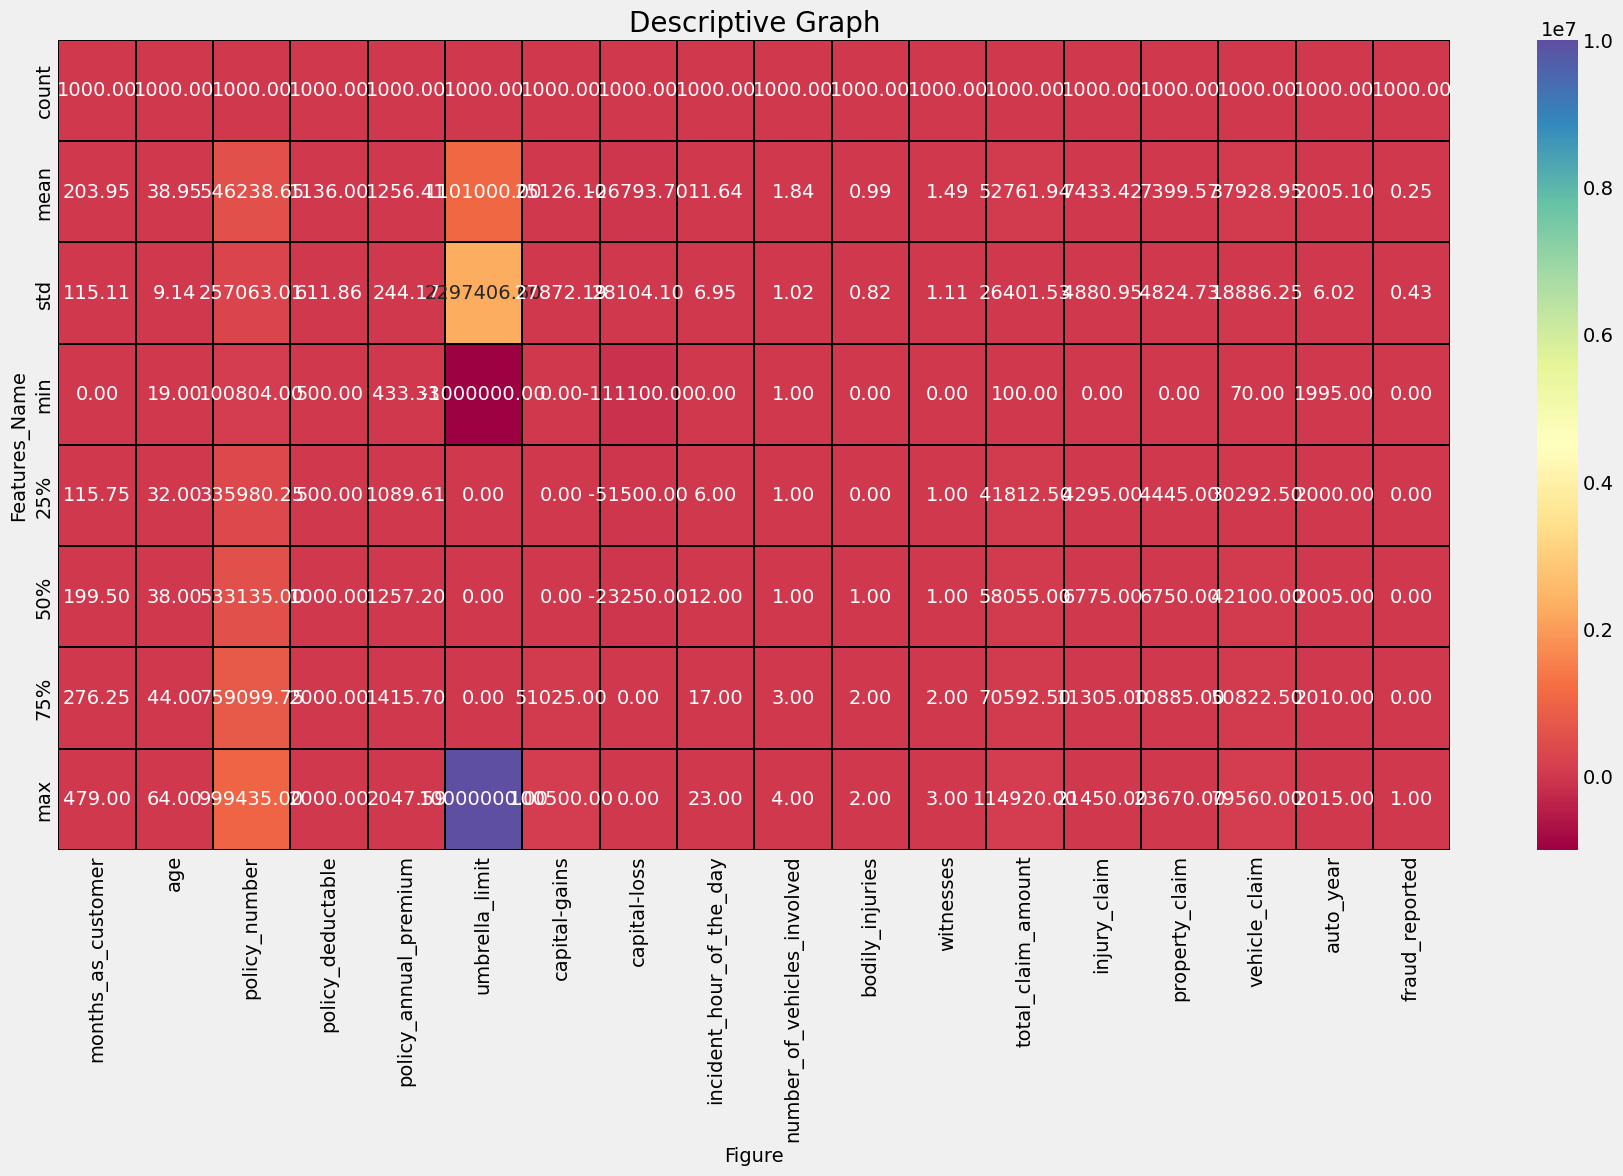

In [49]:
plt.figure(figsize =(20,10))
sns.heatmap(df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

In [50]:
extra = df[df.duplicated()]
extra.shape

(0, 39)

In [54]:
# seperating Numerical and Categorical columns

# Checking for Categorical columns

categorical_col =[]

for i in df.dtypes.index:
    if df.dtypes[i] =="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

# Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print ("Numerical columns:",numerical_col)

Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']


Numerical columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported']


In [55]:
# checking number of unique values in each column

df.nunique().to_frame("No.of unique values")

,No.of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


These are the unique values present in the daraset. Here CustomerID column has the data of unique ID to thecustomers which can be dropped.

(I hope u have learned all the irrelevent data where there are only single values present in whole column or if there is feature that have irrelevent data there are all the unique value then we can drop them. )

In [56]:
# Checking the list of counts of target

df["fraud_reported"].unique() 

array([1, 0], dtype=int64)

In [58]:
# Checking the unique values in tagget column
df["fraud_reported"].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

These are two categories present in the target column namenly “Yes” and “No”

# Lets check how the data has been distributed in remaining in column

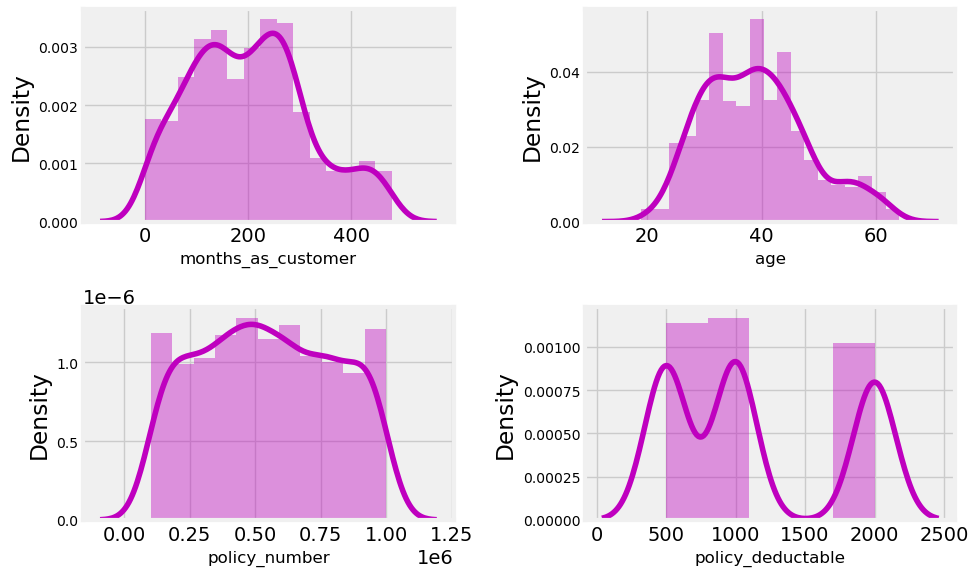

In [59]:
#lets check how the data has been distributed  in remaining in column:
plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

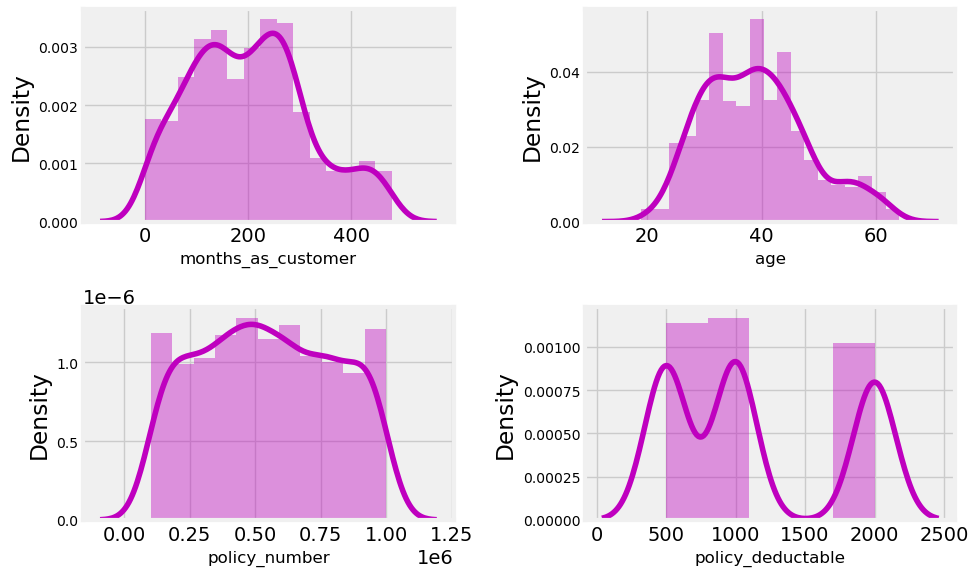

In [60]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df[col], color = "m") 
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
        plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the column except Senior Citizen,and the data in the column TotalCharges is skewed to the right. Other 2 columns tenure and Monthly Charges do not have skewness.

In [61]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64


Default acceptable range for skewness is negative 0.5 to positve 0.5

If skewness value for any feature is 0 it means that data present in the normally distributed and altimate goal is make your data make normally distributed. Altimate gole is make your data normally distributes.

In [62]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

In [63]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [64]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [65]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [67]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,1,14,early_morning
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,1,11,morning


In [68]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


collision_type, property_damage, police_report_available contain many missing values. So, first isolate these variables, inspect these individually for spread of category values.

In [69]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

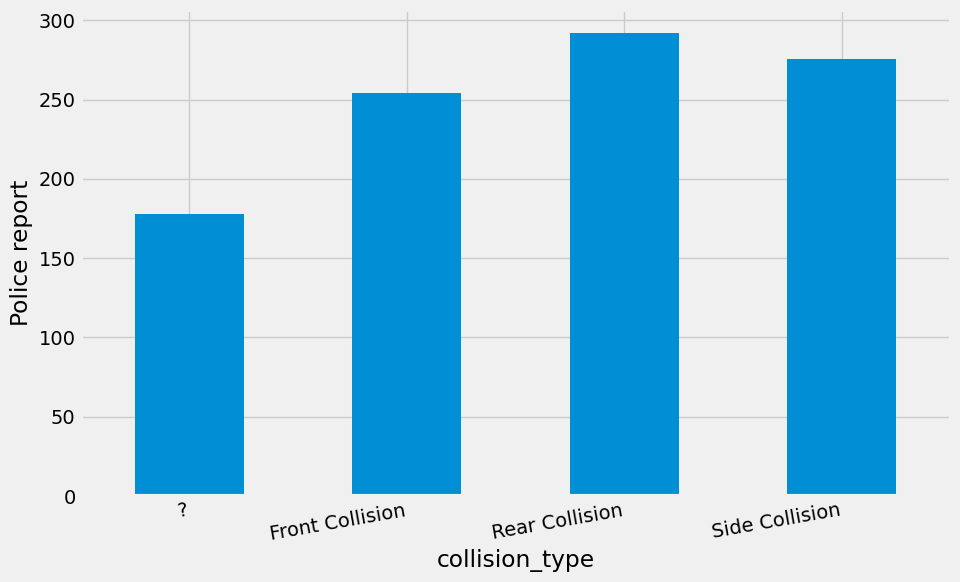

In [70]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [71]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

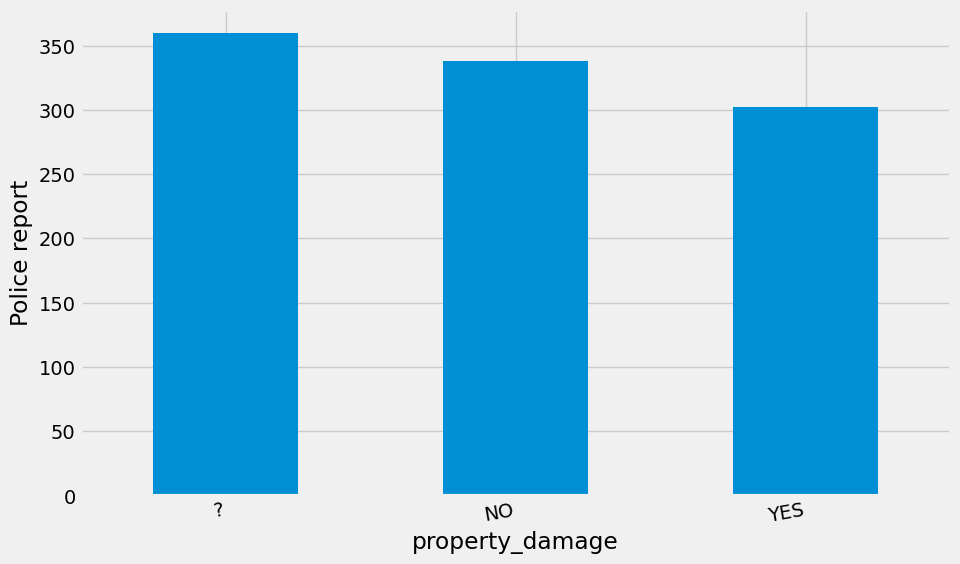

In [72]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [73]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [74]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [75]:
df._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [76]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [77]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

# Applying one-hot encoding to convert all categorical variables except out target variables

'collision_type', 'property_damage', 'police_report_available', 'fraud_reported'

In [78]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,...,2.0,71610,6510,13020,52080,10.0,1.0,1,14,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,0.0,5070,780,780,3510,8.0,12.0,1,11,4.0
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,1.0,34650,7700,3850,23100,4.0,30.0,0,11,4.0
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,1.0,63400,6340,6340,50720,3.0,34.0,1,4,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,1.0,6500,1300,650,4550,0.0,31.0,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,0.0,5.0,2.0,...,0.0,87200,17440,8720,61040,6.0,6.0,0,12,2.0
996,285,41,0.0,0.0,1000,1436.79,0,0.0,6.0,9.0,...,0.0,108480,18080,18080,72320,13.0,28.0,0,3,5.0
997,130,34,2.0,1.0,500,1383.49,3000000,0.0,5.0,1.0,...,2.0,67500,7500,7500,52500,11.0,19.0,0,22,1.0
998,458,62,0.0,2.0,2000,1356.92,5000000,1.0,0.0,5.0,...,2.0,46980,5220,5220,36540,1.0,5.0,0,20,6.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   float64
 8   insured_education_level      1000 non-null   float64
 9   insured_occupation           1000 non-null   float64
 10  insured_hobbies              1000 non-null   float64
 11  insured_relationship         1000 non-null   float64
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

Here we can see float values are present by default fit encode in the float vlaue.

we have converted the categorical columns into numerical columns using Ordinal Encoding method

In [81]:
# Statistical summary of numerical

df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,...,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,0.247000,12.897000,2.822000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,...,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,0.431483,6.015861,2.187945
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,0.000000,8.000000,1.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,0.000000,13.000000,3.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,0.000000,18.000000,5.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,...,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,1.000000,23.000000,6.000000


# Correlation between target variable and independent variables

In [82]:
# Checking the correlation between feature and the target
cor = df.corr()
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,...,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544,0.000292,-0.050762
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,...,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143,-0.001354,-0.022988
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,...,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432,-0.002114,-0.034415
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,...,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190,0.033082,0.002433
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,...,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817,-0.026105,0.013988
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,...,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480,0.049226,-0.002951
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,...,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622,-0.009893,0.006966
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,...,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873,0.028247,-0.039054
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,...,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808,-0.043509,0.023937
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,...,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564,0.006676,0.052618


This gives the correlation between the dependent and independent vatriables. We can visualize this by plotting heatmap.

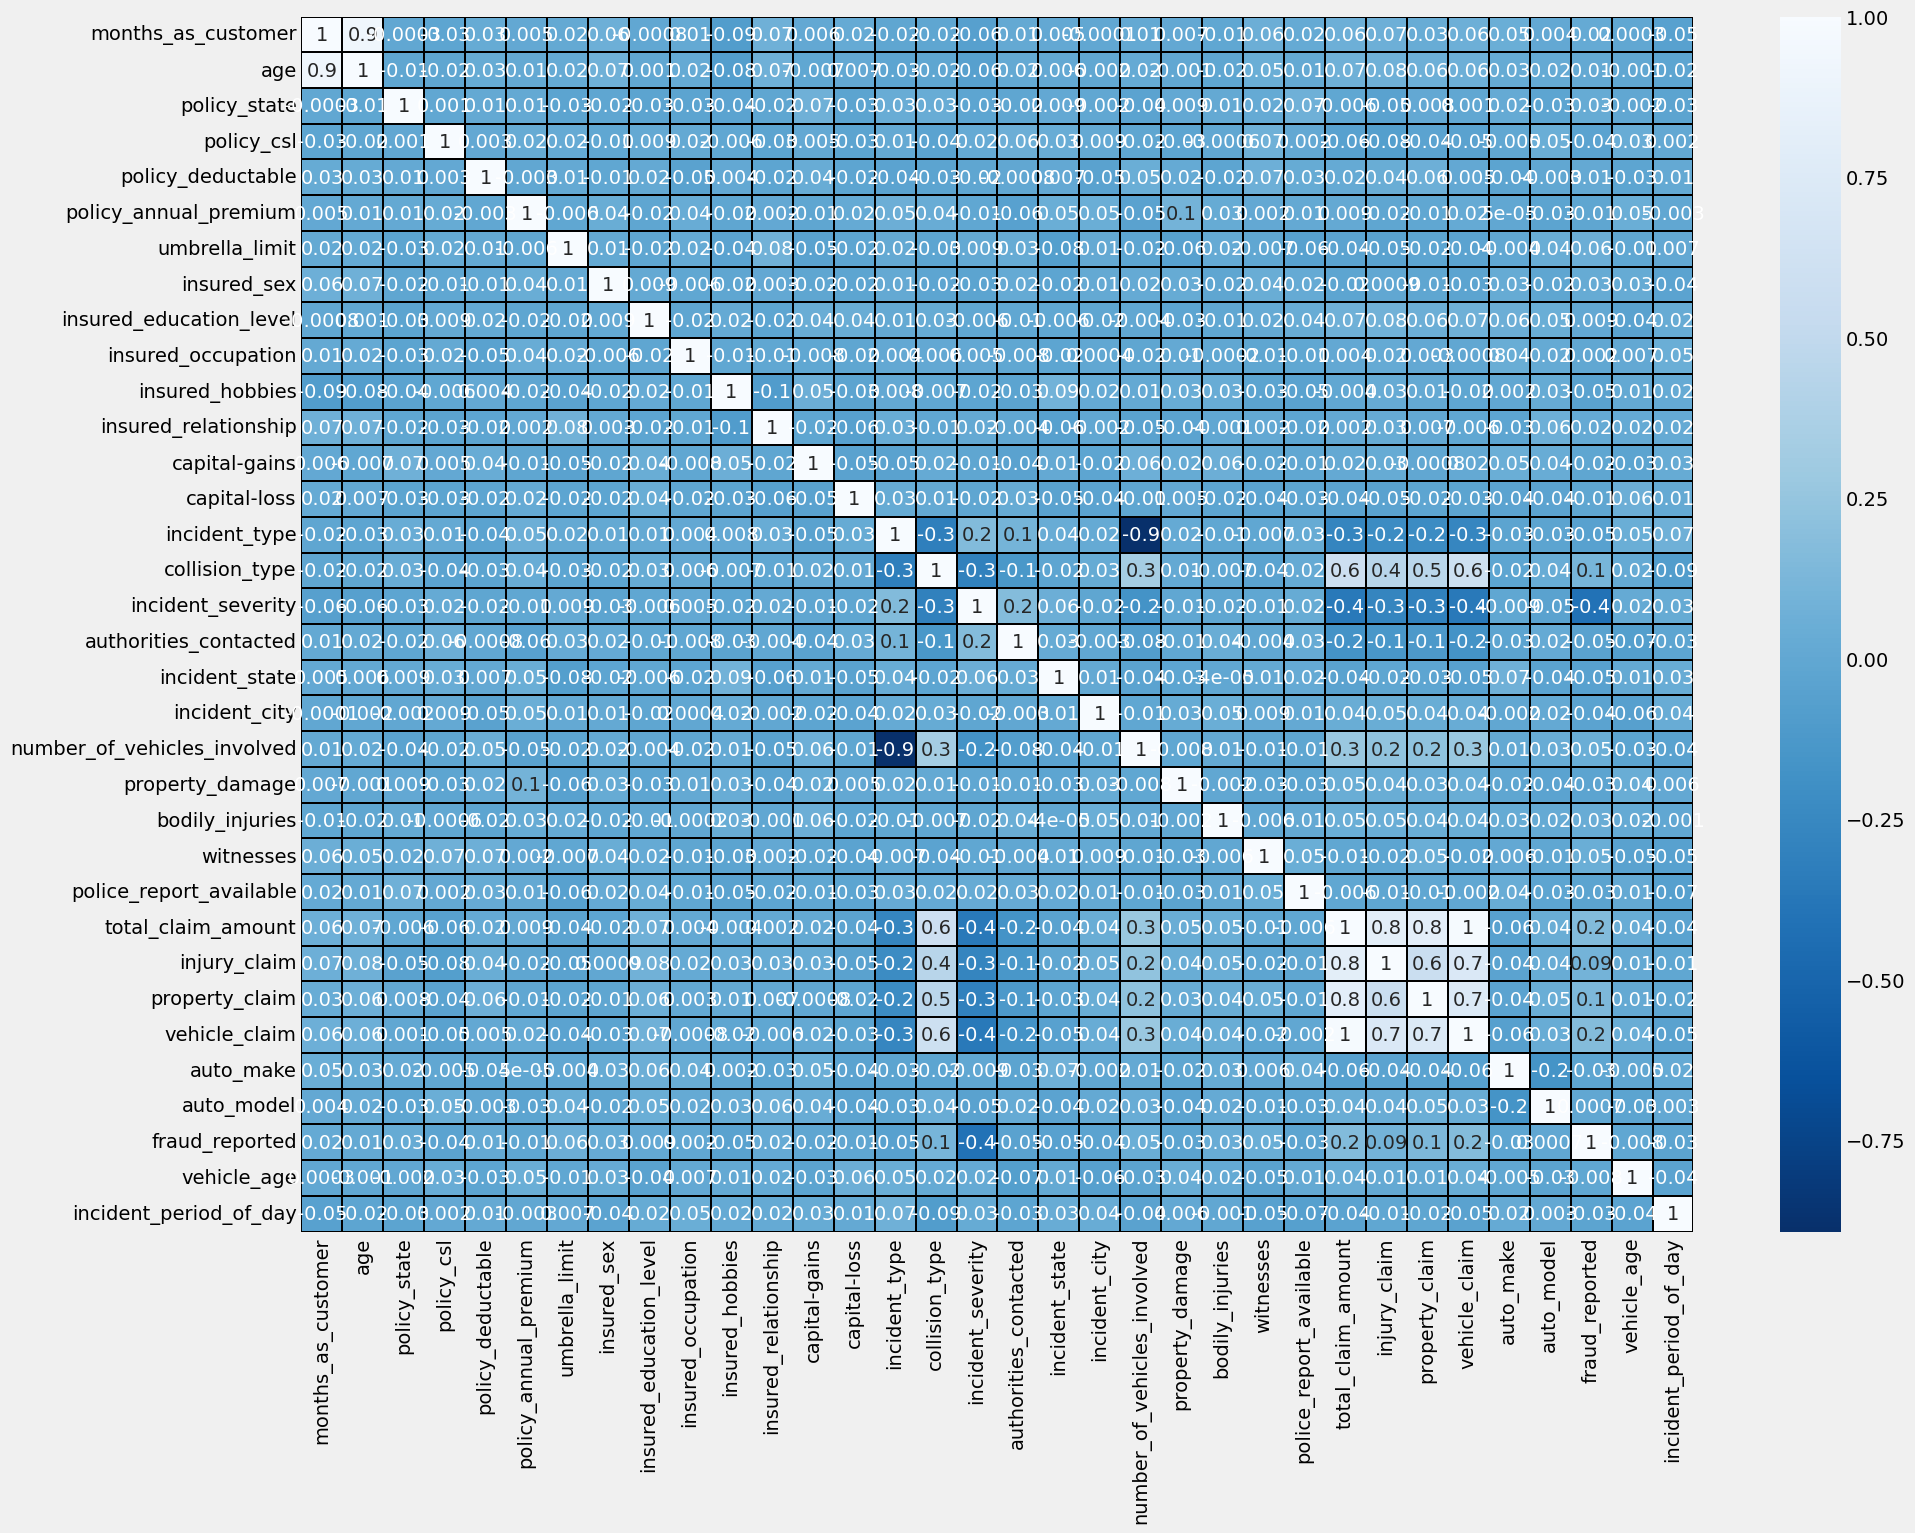

In [83]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

#0- no relation, -0.3 to + 0.3  -less correlation , greater than 0.5 or greater than +0.5 -Moderate correaltion, Greater than -0.7 or greater than +0.7 high correlation 

In [84]:
cor['fraud_reported'].sort_values(ascending =False )

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
insured_occupation             0.001564
auto_model                     0.000720
vehicle_age                   -0.007928
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
auto_make                     -0.027519
police_report_available       -0.028159


# Visualizing the correlation between label and features using bar plot

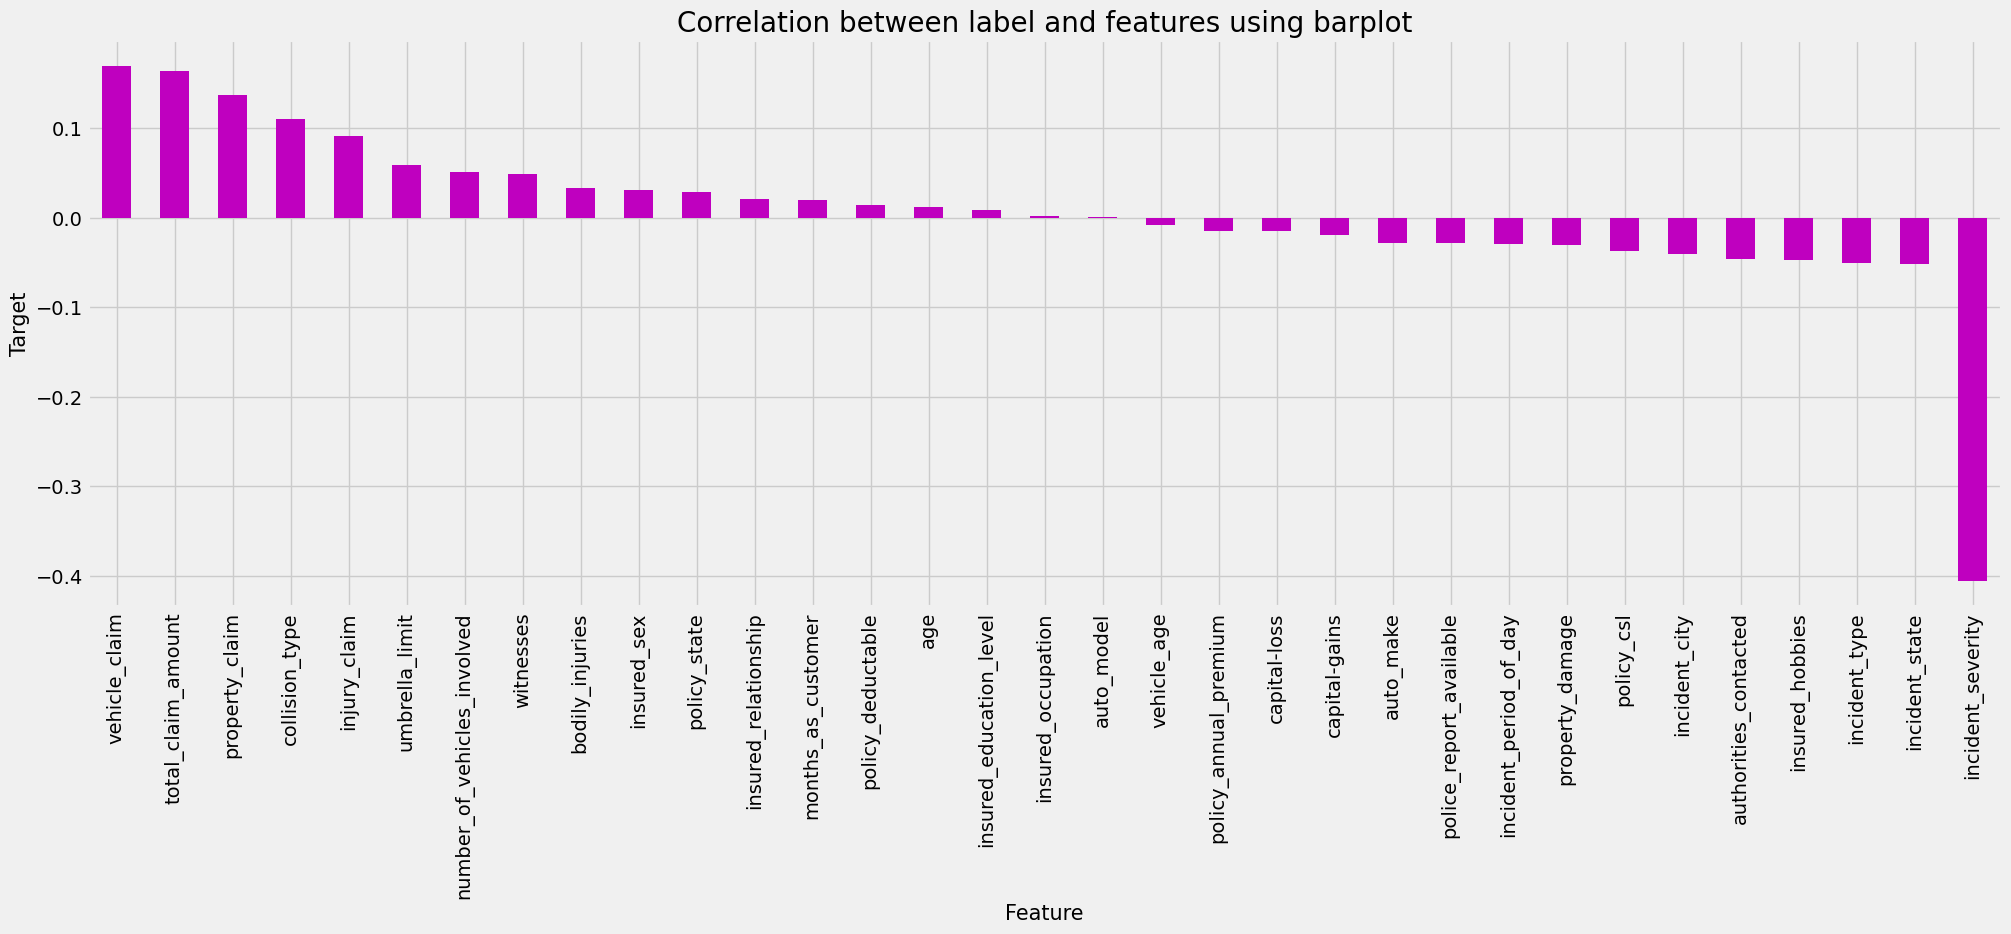

In [86]:
plt.figure(figsize = (22,7))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind ='bar',color ="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

In [87]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,2.0,1.0,1000,1406.91,0,1.0,4.0,2.0,...,2.0,71610,6510,13020,52080,10.0,1.0,1,14,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,1.0,4.0,6.0,...,0.0,5070,780,780,3510,8.0,12.0,1,11,4.0
2,134,29,2.0,0.0,2000,1413.14,5000000,0.0,6.0,11.0,...,1.0,34650,7700,3850,23100,4.0,30.0,0,11,4.0
3,256,41,0.0,1.0,2000,1415.74,6000000,0.0,6.0,1.0,...,1.0,63400,6340,6340,50720,3.0,34.0,1,4,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,1.0,0.0,11.0,...,1.0,6500,1300,650,4550,0.0,31.0,0,9,2.0


# Separating features and label:

In [88]:
# Separating the independent and target variables into X and Y

X = df.drop('fraud_reported', axis=1)
Y = df['fraud_reported']

why we are separting the feature and label, we need to separate the features independent variable and dependent variable.so that we can divinde the data set int 4 part

train data : x-train and y-train

test data: x-test and y -test

In [90]:
print("Features Dimension =",X.shape)
print('Label Dimension =', Y.shape)

Features Dimension = (1000, 33)
Label Dimension = (1000,)


# Features Scalling using standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vehicle_age,incident_period_of_day
0,1.078140,0.990836,1.187173,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,...,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,0.183440,-0.833162
1,0.208995,0.334073,-0.016856,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,...,-1.338700,-1.198712,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.315491,0.538674
2,-0.608002,-1.088913,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,...,1.362107,0.035801,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,-0.315491,0.538674
3,0.452355,0.224613,-1.220886,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,...,0.461838,0.035801,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-1.479664,-0.833162
4,0.208995,0.552994,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,...,-0.438431,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112,-0.375883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,...,-0.438431,-1.198712,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,-0.149180,-0.375883
996,0.704407,0.224613,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,...,1.362107,-1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-1.645974,0.995953
997,-0.642767,-0.541611,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,...,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,1.513924,-0.833162
998,2.208028,2.523284,-1.220886,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,...,-0.438431,1.270313,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,1.181303,1.453231


# Checking Variance Inflation Factor(VIF)

In [93]:
# Finding variance inflation factor in each scales columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(X.values,i)
                   for i in range (len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,6.869487,months_as_customer
1,6.850890,age
2,1.031042,policy_state
3,1.026223,policy_csl
4,1.033050,policy_deductable
5,1.036507,policy_annual_premium
6,1.028774,umbrella_limit
7,1.025581,insured_sex
8,1.030945,insured_education_level
9,1.015739,insured_occupation


By checking VIF values we can find the feature causing Multi collinearity problem.Here we can find the feature TotalChages and tenure have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [95]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Oversampling method

In [96]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [97]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 =SM.fit_resample(X,Y)

In [98]:
# checking values count of target column

Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [99]:
y1.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# Modelling

# Find the best randon state

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0

for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.30, random_state =i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS) 

Best accuracy is 0.911504424778761 at random_state 152


# Creating train test split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =maxRS)

# Classification Algorithms

In [103]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [104]:
# checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7933333333333333
[[207  15]
 [ 47  31]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       222
           1       0.67      0.40      0.50        78

    accuracy                           0.79       300
   macro avg       0.74      0.66      0.68       300
weighted avg       0.78      0.79      0.77       300



# LogisticRegression

In [105]:
# checking accuracy for LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7766666666666666
[[209  13]
 [ 54  24]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       222
           1       0.65      0.31      0.42        78

    accuracy                           0.78       300
   macro avg       0.72      0.62      0.64       300
weighted avg       0.76      0.78      0.75       300



# Support Vector Machine Classifier

In [106]:
# checking accuracy for support Vector Machine classifier

svc = SVC ()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7433333333333333
[[222   0]
 [ 77   1]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       222
           1       1.00      0.01      0.03        78

    accuracy                           0.74       300
   macro avg       0.87      0.51      0.44       300
weighted avg       0.81      0.74      0.64       300



# Gradient Boosting Classifier

In [107]:
# checking accuracy for Gradient Boosting Classifier
GB= GradientBoostingClassifier()
GB .fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.85
[[200  22]
 [ 23  55]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       222
           1       0.71      0.71      0.71        78

    accuracy                           0.85       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.85      0.85      0.85       300



# AdaBoost Classifier

In [108]:
# checking accuracy for AdaBoostClassifier
ABC=  AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.79
[[200  22]
 [ 41  37]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       222
           1       0.63      0.47      0.54        78

    accuracy                           0.79       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.78      0.79      0.78       300



# BaggingClassifier

In [109]:
# checking accuracy for BaggingClassifier
BC =  BaggingClassifier()
BC .fit(x_train,y_train)
predBC = BC.predict(x_test)

print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.84
[[200  22]
 [ 26  52]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       222
           1       0.70      0.67      0.68        78

    accuracy                           0.84       300
   macro avg       0.79      0.78      0.79       300
weighted avg       0.84      0.84      0.84       300



# Extra TreeClassifier

In [110]:
# checking accuracy for ExtraTreesClassifier
ET=  ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)

print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7566666666666667
[[218   4]
 [ 69   9]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       222
           1       0.69      0.12      0.20        78

    accuracy                           0.76       300
   macro avg       0.73      0.55      0.53       300
weighted avg       0.74      0.76      0.69       300



Confusion matrix
[[200  22]
 [ 23  55]]


<Figure size 640x480 with 0 Axes>

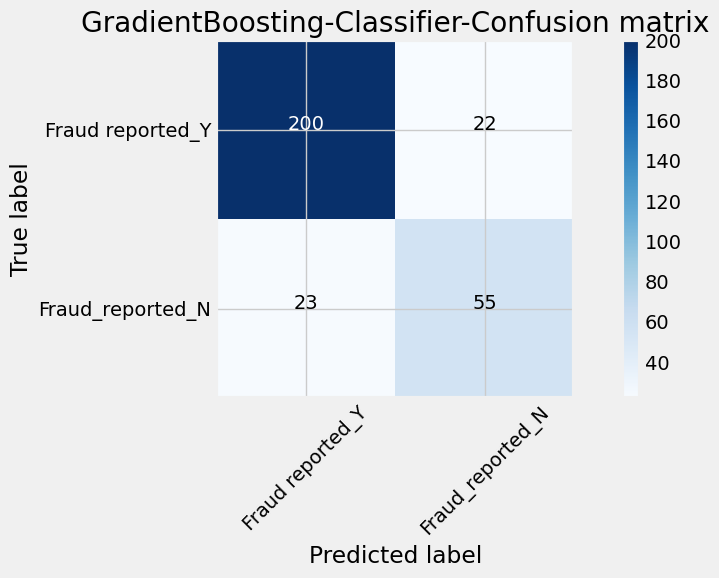

In [113]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predGB)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='GradientBoosting-Classifier-Confusion matrix')

With 72.5% accuracy, we take a closer look at the confusion matrix:
200 transactions were classified as valid that were actually valid
22 transactions were classified as fraud that were actually valid (type 1 error)
23 transactions were classified as valid that were fraud (type 2 error)
55 transactions were classified as fraud.
Err = ((FP+FN)/ (TP+TN+FN+FP) = {(23+22) / (200+22+23+55)}*100 = 0.183

So, the algorithm misclassified 18.3% fraudulent transactions. We looked at other measures too like the Cohen Kappa, Recall, and F1 score. In each case, the scores are closer to 1.

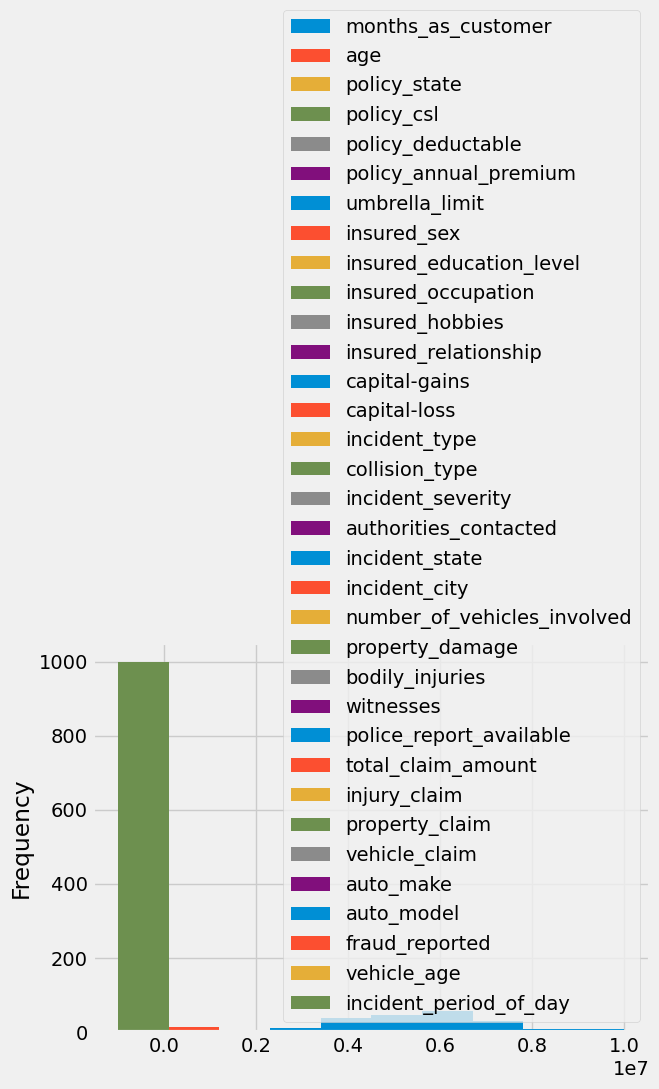

In [114]:
# Generate a Histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

In [115]:
# Minimum and maximum premium 
print('Minimum premimum ' + str(df['policy_annual_premium'].min()))
print('Maximum premium ' + str(df['policy_annual_premium'].max()))

Minimum premimum 433.33
Maximum premium 2047.59


In [116]:
# Minimum and maximum age of vehicle
print('Vehicle age-minimum ' + str(df['vehicle_age'].min()))
print('Vehicle Age-maximum ' + str(df['vehicle_age'].max()))

Vehicle age-minimum 3
Vehicle Age-maximum 23


In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

Above a list of each algorithm, the mean accuracy and the standard deviation accuracy and a box & whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

It is clear that the LR or LDA is good enough for both feature selection (81% and 84% accuracy with 100 features) as well as model selection.

I will analyse both both logistic regression and linear discriminate analysis further on this problem.

LR: 0.738571 (0.064222)
XGB: 0.792857 (0.041527)
KNN: 0.722857 (0.033927)
DT: 0.768571 (0.045981)
SVM: 0.757143 (0.049487)
RF: 0.748571 (0.052761)
ADA: 0.775714 (0.039409)


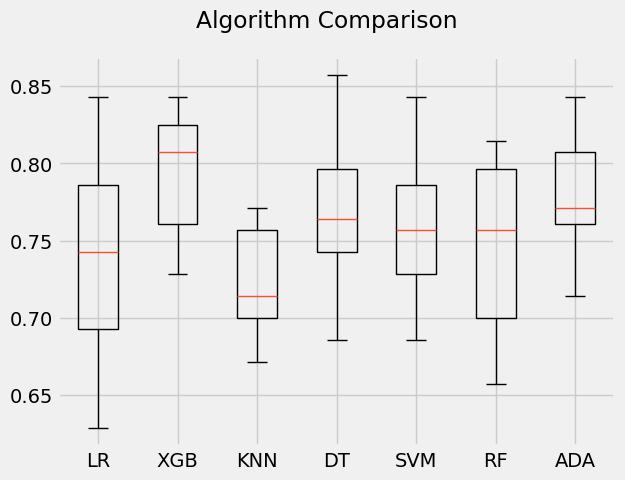

In [124]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Above a list of each algorithm, the mean accuracy and the standard deviation accuracy and a box & whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

It is clear that the XGB or XGB is good enough for both feature selection (79% and 84% accuracy with 100 features) as well as model selection.

I will analyse both both logistic regression and linear discriminate analysis further on this problem.

end